# Thermal Long Term Trending

This notebook includes all MSIDs previously monitored with the exceptions shown below. 

In [1]:
from os.path import expanduser
from os import environ
import sys
from IPython.core.display import display, HTML
# environ["SKA_DATA"] = "/proj/sot/ska/data"

home = expanduser("~")
addthispath = home + '/AXAFLIB/fot_trend/'
sys.path.append(addthispath)
from fot_trend.jupyter_trend_lib import gen_figure

# Use this if you are running jupyterlab
# %matplotlib ipympl

# Use this if you want to be able to zoom or easily save a plot:
# %matplotlib notebook
%matplotlib widget

# Use this if you want to be able to cycle through plots faster:
# %matplotlib inline

from matplotlib import rcParams
import matplotlib.pyplot as plt
# plt.style.use('dark_background')
# rcParams['axes.facecolor'] = [.5,.55,.6]
display(HTML("<style>.container { width:90% !important; }</style>"))

Using G_LIMMON DB Here:/Users/matthewdahmer/AXAFDATA/SKADATA/glimmon_archive/
Using TDB Here:/Users/matthewdahmer/AXAFDATA/SKADATA/fot_tdb_archive/


## These MSIDs are not included in this notebook:

### These are not in the local copy of the engineering archive (some are not available in the source archive):
 - CPA1BPT
 - CPA2BPT
 - CUSOAIT
 - CXPNAIT
 - CXPNBIT
 - 5EHSE300
 - EB1T1
 - EB1T2
 - EB1T3
 - EB2T1
 - EB2T2
 - EB2T3
 - EB3T1
 - EB3T2
 - EB3T3
 
### These are not decommed correctly
 - 4CSDHAV
 
### These are ommitted since they are somewhat redundant with the power msids already shown and due to the complexity of plotting the associated data (bi-level data at high sampling rate).
 - All 4OHTRZXX where XX ranges from 01 to 80




--------------------------------------------------------------------------------------------------------------
## Define MSID Lists
Define lists of MSIDs, where each list will be used to generate a different set of plots.

In [2]:

isim_msids = ['1CBAT','1CBBT','1CRAT','1CRBT','1DACTBT','1DEAMZT','1DPAMYT','1DPAMZT','1OAHAT',
              '1OAHBT','1PDEAAT','1PDEABT','1PIN1AT','1SSMYT','1SSPYT','1WRAT','1WRBT','2CEAHVPT',
              '2CHTRPZT','2CONDMXT','2DCENTRT','2DTSTATT','2FHTRMZT','2FRADPYT', '2LVPLATM', '2PMT1T','2PMT2T',
              '2UVLSPXT','3BTU_BPT','3FABRAAT','3FABRCAT', '3FAFLAAT', '3FAFLCAT','3FAMTRAT','3FAMYZAT',
              '3FAPSAT','3FAPYZAT','3FARALAT','3FASEAAT','3FLCABPT','3RCTUBPT','3TRMTRAT',
              '3TSMXCET','3TSMXSPT','3TSMYDPT','3TSPYFET','3TSPZDET','3TSPZSPT','3TTACS1T',
              '3TTACS2T','3TTACS3T','3TTBRGBT','3TTHRC1T','3TTHRC2T','3TTHRC3T','3TTRALAT',
              '3TTRALCT','3TTVALVT', 'FPTEMP_11']

neg_z_side_sensors = ['5EIOT','5EPHINT','TEIO','TEPHIN','TFSSBKT1','TFSSBKT2',
                      'TESH1','TESH2']


eps_msids = ['TSAMYT','TSAPYT','4CSDHAV', 'ESAMYI', 'ESAPYI']



aca_and_pcad_msids = ['AACBPPT','AACBPRT','AACCCDPT','AACCCDRT','AACH1T','AACH2T','AAOTALT',
                      'AAOTAPMT','AAOTASMT','AAOTH2MT','TAPE1PST','TAPE2PST','TATECDPT',
                      'TATECDRT','AIRU2G1T','AIRU2G2T','AIRU2VFT', 'AIRU2BT', 'AIRU1BT',
                     'AIRU1G1T','AIRU1G2T','AIRU1VFT', 'TAPEA1T', 'TAPEA2T']


passive_telescope_msids = ['4HFSPAT','4HFSPBT','4LFSPAT','4LFSPBT','4PRT1AT','4PRT2AT','4PRT3AT',
                           '4PRT4AT','4PRT5AT','4RT555T','4RT556T','4RT557T','4RT558T','4RT559T',
                           '4RT560T','4RT561T','4RT562T','4RT563T','4RT564T','4RT565T','4RT567T',
                           '4RT568T','4RT569T','4RT570T','4RT575T','4RT576T','4RT577T','4RT578T',
                           '4RT579T','4RT580T','4RT581T','4RT582T','4RT583T','4RT584T','4RT585T',
                           '4RT586T','4RT587T','4RT588T','4RT589T','4RT590T','4RT591T','4RT592T',
                           '4RT593T','4RT594T','4RT595T','4RT596T','4RT597T','4RT598T','4RT700T',
                           '4RT701T','4RT702T','4RT703T','4RT704T','4RT705T','4RT706T','4RT707T',
                           '4RT708T','4RT709T','4RT710T','4RT711T']


active_hrma_msids = ['OHRTHR02','OHRTHR03','OHRTHR04','OHRTHR05','OHRTHR06','OHRTHR07','OHRTHR08',
                     'OHRTHR09','OHRTHR10','OHRTHR11','OHRTHR12','OHRTHR13','OHRTHR14','OHRTHR15',
                     'OHRTHR17','OHRTHR18','OHRTHR19','OHRTHR20','OHRTHR21','OHRTHR22','OHRTHR23',
                     'OHRTHR24','OHRTHR25','OHRTHR26','OHRTHR27','OHRTHR29','OHRTHR30','OHRTHR31',
                     'OHRTHR33','OHRTHR34','OHRTHR35','OHRTHR36','OHRTHR37','OHRTHR38','OHRTHR39',
                     'OHRTHR40','OHRTHR41','OHRTHR42','OHRTHR43','OHRTHR44','OHRTHR45','OHRTHR46',
                     'OHRTHR47','OHRTHR49','OHRTHR50','OHRTHR51','OHRTHR52','OHRTHR53','OHRTHR54',
                     'OHRTHR55','OHRTHR56','OHRTHR57','OHRTHR58','OHRTHR59','OHRTHR60','OHRTHR61',
                     'OHRTHR62','OHRTHR63']

active_oba_msids = ['OOBTHR02','OOBTHR03','OOBTHR04','OOBTHR05','OOBTHR06','OOBTHR07','OOBTHR08',
                    'OOBTHR09','OOBTHR10','OOBTHR11','OOBTHR12','OOBTHR13','OOBTHR14','OOBTHR15',
                    'OOBTHR17','OOBTHR18','OOBTHR19','OOBTHR20','OOBTHR21','OOBTHR22','OOBTHR23',
                    'OOBTHR24','OOBTHR25','OOBTHR26','OOBTHR27','OOBTHR28','OOBTHR29','OOBTHR30',
                    'OOBTHR31','OOBTHR33','OOBTHR34','OOBTHR35','OOBTHR36','OOBTHR37','OOBTHR38',
                    'OOBTHR39','OOBTHR40','OOBTHR41','OOBTHR42','OOBTHR43','OOBTHR44','OOBTHR45',
                    'OOBTHR46','OOBTHR47','OOBTHR49','OOBTHR50','OOBTHR51','OOBTHR52','OOBTHR53',
                    'OOBTHR54','OOBTHR55','OOBTHR56','OOBTHR57','OOBTHR58','OOBTHR59','OOBTHR60',
                    'OOBTHR61','OOBTHR62','OOBTHR63', 'OOBAGRD1', 'OOBAGRD2', 'OOBAGRD3', 'OOBAGRD4', 'OOBAGRD5', 'OOBAGRD6']

telescope_power_msids = ['P01','P02','P03','P04','P05','P06','P07','P08','P09','P10','P11','P12',
                         'P13','P14','P15','P16','P17','P18','P19','P20','P23','P24','P25','P26',
                         'P27','P28','P29','P30','P31','P32','P33','P34','P35','P36','P37','P38',
                         'P39','P40','P41','P42','P43','P44','P45','P46','P47','P48','P49','P50',
                         'P51','P52','P53','P54','P55','P57','P58','P59','P60','P61','P62','P63',
                         'P64','P65','P66','P67','P68','P69','P75','P76','P77','P78','P79','P80']

telescope_power_stat_msids = ['PABH','PAFTCONE','PAFTCYL','PAHP','PCONE','PFAP','PFWDCONE',
                              'PFWDCYL','PHRMA','PHRMASTRUTS','PIC','PMIDCONE','PMNT','POBAT',
                              'POC','PPL10','PRADVNT','PSCSTRUTS','PTFTE','PTOTAL']

telescope_derived_misc_msids = ['EE_AXIAL','EE_BULK','EE_DIAM','EE_RADIAL','EE_THERM','HAAG',
                                 'HARG','HMAX35','HMIN35','HMCSAVE','OBAAG','OBAAGW','OBACAVE',
                                 'OBACAVEW','OBADIG','OBADIGW','OMAX34','OMIN34','HADG',
                                 'TILT_AXIAL','TILT_BULK','TILT_DIAM','TILT_MAX','TILT_RSS']

healthcheck_msids = ['HRMA_AVE','4OAVHRMT','HRMHCHK','OBA_AVE','4OAVOBAT','TSSMAX','TSSMIN',
                     'TABMAX','TABMIN','THSMAX','THSMIN','OHRMGRD3','OHRMGRD6']

tel_calibration_msids = ['OHRMGRD1','OHRMGRD2', 'OHRMGRD3','OHRMGRD4', 'OHRMGRD5','OHRMGRD6', 'OHRMGRD7','OHRMGRD8']


propulsion_msids = ['PCM01T','PCM02T','PCM03T','PCM04T','PFDM101T','PFDM102T','PFDM201T',
                    'PFDM202T','PFFP01T','PFTANK1T','PFTANK2T','PHETANKT','PHOFP1T','PLAEV1AT',
                    'PLAEV1BT','PLAEV2AT','PLAEV3AT','PLAEV3BT','PLAEV4AT','PLAEV4BT','PLINE01T',
                    'PLINE02T','PLINE03T','PLINE04T','PLINE05T','PLINE06T','PLINE07T','PLINE08T',
                    'PLINE09T','PLINE10T','PLINE11T','PLINE12T','PLINE13T','PLINE14T','PLINE15T',
                    'PLINE16T','PM1THV1T','PM1THV2T','PM2THV1T','PM2THV2T','PM3THV1T','PM3THV2T',
                    'PM4THV1T','PM4THV2T',
                    'PMFP01T','PMTANK1T','PMTANK2T','PMTANK3T']


spacecraft_msids = ['TASPPCM','TASPPCP','TASPPCU','TASPRWC','TCM_CTU','TCM_IFU','TCM_OBC',
                    'TCM_PA1','TCM_PA2','TCM_PAN','TCM_RFAS','TCM_SSR1','TCM_SSR2','TCM_TX1',
                    'TCM_TX2','TCM_USO','TCNR_BRM','TCYLAFT1','TCYLAFT2','TCYLAFT3','TCYLAFT4',
                    'TCYLAFT5','TCYLAFT6','TCYLCMM','TCYLFMZM','TCYLFMZP','TCYLPCM','TCYLPCP',
                    'TCYLRWC','TCYZ_RW1','TPCP_RW2','TPCP_RW3','TPCM_RW4','TPCM_RW5','TCYZ_RW6',
                    'TEP_BPAN','TEP_EIA','TEP_PCU','TEP_PPAN','TEP_PSU1','TEP_PSU2','TEP_RCTU',
                    'TFSPCMM','TFSPCMP','TFSPPCM','TFSPPCP','TFSPPCU','TFSPRWC','TFUTSUPN',
                    'TMYSADA','TMZP_CNT','TMZP_MY','TMZP_PY','TOXTSUPN','TPC_CEA','TPC_DEA',
                    'TPC_ESE','TPC_FSSE','TPC_PAN','TPC_RCTU','TPC_WDA','TPYSADA','TMZLGABM',
                    'TPZLGABM','TRSPMTPC','TRSPOTEP','TRSPOTEX','TRSPOTPC','TRSPRWBB','TRSPRWBC',
                    'TRSPRWCM','TSCTSF1','TSCTSF2','TSCTSF3','TSCTSF4','TSCTSF5','TSCTSF6', 'CUSOAIT', 'CUSOBIT']

propulsion_dome = ['PLAED1AT','PLAED1BT','PLAED1CT','PLAED1DT','PLAED1ET','PLAED1FT','PLAED1GT',
                   'PLAED1HT','PLAED1IT','PLAED2AT','PLAED2BT','PLAED2CT','PLAED2DT','PLAED2ET',
                   'PLAED2FT','PLAED2GT','PLAED2HT','PLAED2IT','PLAED3AT','PLAED3BT','PLAED3CT',
                   'PLAED3DT','PLAED3ET','PLAED3FT','PLAED3GT','PLAED3HT','PLAED3IT','PLAED4AT',
                   'PLAED4BT','PLAED4CT','PLAED4DT','PLAED4ET','PLAED4FT','PLAED4GT','PLAED4HT',
                   'PLAED4IT']

propulsion_rcs = ['POR1TV01T','POR1TV02T','POR2TV01T','POR2TV02T','PR1TV01T','PR1TV02T','PR2TV01T',
                  'PR2TV02T','PR3TV01T','PR3TV02T','PR4TV01T','PR4TV02T']


reaction_wheel_current = ['AWD1TQI','AWD2TQI','AWD3TQI','AWD4TQI','AWD5TQI','AWD6TQI']

--------------------------------------------------------------------------------------------------------------
## Generate Interactive Trending Plots

In [3]:
group_name = 'sc'
gen_figure(reaction_wheel_current, group_name, maudefill=False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [6]:
group_name = 'isim'
gen_figure(isim_msids, group_name, maudefill=False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [5]:
group_name = 'sc'
gen_figure(neg_z_side_sensors, group_name)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [6]:
group_name = 'sc'
gen_figure(eps_msids, group_name)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [3]:
group_name = 'sc'
gen_figure(aca_and_pcad_msids, group_name)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
group_name = 'tel'
gen_figure(passive_telescope_msids, group_name)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [9]:
group_name = 'tel'
gen_figure(active_hrma_msids, group_name)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:
group_name = 'tel'
gen_figure(active_oba_msids, group_name)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
group_name = 'sc'
gen_figure(['dist_satearth', 'aosares1', 'aosares2'], group_name)

In [5]:
group_name = 'tel'
gen_figure(healthcheck_msids, group_name)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
group_name = 'tel'
gen_figure(telescope_power_msids, group_name)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [14]:
group_name = 'tel'
gen_figure(tel_calibration_msids, group_name)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [15]:
group_name = 'tel'
gen_figure(telescope_power_stat_msids, group_name)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [16]:
group_name = 'tel'
gen_figure(telescope_derived_misc_msids, group_name)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [7]:
group_name = 'sc'
gen_figure(propulsion_msids, group_name)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [18]:
group_name = 'sc'
gen_figure(propulsion_dome, group_name)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
group_name = 'sc'
gen_figure(propulsion_rcs, group_name)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
group_name = 'sc'
gen_figure(spacecraft_msids, group_name)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
group_name = 'sc'
gen_figure(['dist_satearth', 'aosares1', 'aosares2'], group_name)

In [ ]:
group_name = 'tel'
gen_figure(['4csdhav', '4sp51v'], group_name)

In [ ]:
group_name = 'tel'
gen_figure(['elbi','elbv'], group_name)

# Planning Limit Review (TCYLAFT6, 4RT700T)

In [ ]:
msids = ['1CBBT', '1DACTBT', '1DEAMZT', '1DPAMZT', '3TSMXSPT']
gen_figure(msids, 'isim')

In [ ]:
msids = ['4HFSPAT', '4HFSPBT', '4LFSPAT', '4LFSPBT', '4RT568T', '4RT577T', '4RT578T', '4RT584T', '4RT585T',
         '4RT586T', '4RT590T', '4RT591T', '4RT597T', '4RT598T', 'OHRTHR38', 'OOBTHR04', 'OOBTHR05', 'OOBTHR06',
         'OOBTHR19', 'OOBTHR20', 'OOBTHR21', 'OOBTHR25', 'OOBTHR26', 'OOBTHR27',
         'OOBTHR28', 'OOBTHR30', 'OOBTHR45', 'OOBTHR51', 'OOBTHR52', 'OOBTHR56',
         'OOBTHR57', 'OOBTHR60', 'TSSMAX', 'HRMA_AVE', 'OBA_AVE']
gen_figure(msids, 'tel')

In [ ]:
msids = ['PFTANK1T', 'PFTANK2T', 'PM1THV1T', 'PM1THV2T', 'TAPE1PST', 'TAPE2PST', 'TATECDPT', 'TATECDRT', 'TCYLFMZM',
         'TEIO', 'TEPHIN', 'TFSSBKT1', 'TFSSBKT2', 'TMZP_CNT', 'TMZP_MY', '5EIOT', '5EPHINT', 'AACBPPT', 'AACBPRT',
         'AACCCDPT', 'AACCCDRT', 'AAOTALT', 'AAOTAPMT', 'AAOTASMT', 'AAOTH2MT', 'TCYLAFT6', '4RT700T']
gen_figure(msids, 'sc')

In [ ]:
26*58.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.font_manager as font_manager

from Chandra.Time import DateTime
from Ska.engarchive import fetch_eng as fetch

# from plot_cxctime_custom import *
lightfont = font_manager.FontProperties(weight='light')


In [ ]:

data = fetch.Msidset(['aach1t', 'aacbppt','aacccdpt', 'aacccdrt', 'aopcadmd', 'coradmen'], '2010:001', stat='5min')
data.interpolate()
keep = (data['aopcadmd'].vals == 'NPNT')# & (data['coradmen'].vals == 'ENAB')



In [ ]:
data['coradmen'].vals

In [ ]:
plt.rcParams['xtick.major.pad'] = '10'
fig = plt.figure(facecolor=[1,1,1],figsize=(8,6))
ax = fig.add_axes([0.15, 0.15, 0.75, 0.75])
ax.hold(True)
ax.plot(data['aacbppt'].vals, data['aach1t'].vals, color=[0.3, 0.3, 0.3])
ax.set_yticks(range(60, 95, 5))
ax.set_yticklabels(range(60, 95, 5), fontsize=18)
ax.set_xticks(range(70, 110, 5))
ax.set_xticklabels(range(70, 110, 5), fontsize=18)
ax.grid(True)
ax.set_xlabel('AACBPPT Temperature (Deg F)', fontsize=18)
ax.set_ylabel('AACH1T Temperature (Deg F)', fontsize=18)
ax.set_title('Correlation between AACBPPT and AACH1T', fontsize=24, y=1.05)
ax.annotate('AACBPPT - AACH1T ~ 14F\nat hot temperatures.', xy=(100, 85), xytext=(95, 65), 
            fontsize=16,arrowprops=dict(arrowstyle="->"), va='center', ha='center')

In [ ]:
fig = plt.figure(facecolor=[1,1,1],figsize=(10,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.hold(True)
ax.plot(data.times, data['aach2t'].vals - data['aach1t'].vals, color=[0.3, 0.3, 0.3])

In [ ]:
plt.rcParams['xtick.major.pad'] = '10'
fig = plt.figure(facecolor=[1,1,1],figsize=(8,6))
ax = fig.add_axes([0.15, 0.15, 0.75, 0.75])
ax.hold(True)
ax.plot(data['aach2t'].vals, data['aach1t'].vals, color=[0.3, 0.3, 0.3])
# ax.set_yticks(range(60, 95, 5))
# ax.set_yticklabels(range(60, 95, 5), fontsize=18)
# ax.set_xticks(range(70, 110, 5))
# ax.set_xticklabels(range(70, 110, 5), fontsize=18)
ax.grid(True)
ax.set_xlabel('AACBPPT Temperature (Deg F)', fontsize=18)
ax.set_ylabel('AACH1T Temperature (Deg F)', fontsize=18)
ax.set_title('Correlation between AACBPPT and AACH1T', fontsize=24, y=1.05)
ax.annotate('AACBPPT - AACH1T ~ 14F\nat hot temperatures.', xy=(100, 85), xytext=(95, 65), 
            fontsize=16,arrowprops=dict(arrowstyle="->"), va='center', ha='center')

In [ ]:
plt.rcParams['xtick.major.pad'] = '10'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14



fig = plt.figure(facecolor=[1,1,1],figsize=(12,6))
ax = fig.add_axes([0.15, 0.15, 0.75, 0.7])
ax.hold(True)
ax.plot(data['aacccdpt'].vals[keep], data['aach1t'].vals[keep], '.', color=[0.3, 0.3, 0.3])
ax.axvline(-9.5 * 9 / 5 + 32, linestyle='--', color=[0.3, 0.3, 0.3])
ax.axvline(-8.5 * 9 / 5 + 32, linestyle='--', color=[0.8, 0.8, 0.8])
ax.axvline(-7.5 * 9 / 5 + 32, linestyle='--', color=[0.8, 0.8, 0.8])




# ax.set_yticks(range(60, 95, 5))
# ax.set_yticklabels(range(60, 95, 5), fontsize=18)
# ax.set_xticks(range(70, 110, 5))
# ax.set_xticklabels(range(70, 110, 5), fontsize=18)
ax.grid(True)
ax.set_xlabel('AACCCDPT Temperature (Deg F)', fontsize=18)
ax.set_ylabel('AACH1T Temperature (Deg F)', fontsize=18)
ax.set_title('Correlation between ACA CCD and AACH1T\n(During Normal Point Mode)', fontsize=24, y=1.01)
ax.annotate('Planning Limit of -9.5C', xy=(15, 73), xytext=(23, 73), 
            fontsize=16, color=[0.3, 0.3, 0.3], arrowprops=dict(arrowstyle="->", color=[0.3, 0.3, 0.3]), va='center', ha='center')
ax.annotate('-7.5C', xy=(18.5, 83), xytext=(23, 83), 
            fontsize=16, color=[0.6, 0.6, 0.6], arrowprops=dict(arrowstyle="->", color=[0.6, 0.6, 0.6]), va='center', ha='center')


ax.set_xbound(data['aacccdpt'].vals.min() - 3, 30)

In [ ]:
plt.rcParams['xtick.major.pad'] = '10'
fig = plt.figure(facecolor=[1,1,1],figsize=(12,6))
ax = fig.add_axes([0.15, 0.15, 0.75, 0.7])
ax.hold(True)
ax.plot((data['aacccdpt'].vals[keep] - 32) * 5 / 9, (data['aach1t'].vals[keep]-32) * 5 / 9, '.', color=[0.3, 0.3, 0.3])
ax.axhline((100 - 32) * 5 / 9, linestyle='--', color=[0.3, 0.3, 0.3])
# ax.axvline(-8.5 * 9 / 5 + 32, linestyle='--', color=[0.8, 0.8, 0.8])
# ax.axvline(-7.5 * 9 / 5 + 32, linestyle='--', color=[0.8, 0.8, 0.8])

# ax.set_yticks(range(60, 95, 5))
# ax.set_yticklabels(range(60, 95, 5), fontsize=18)
# ax.set_xticks(range(70, 110, 5))
# ax.set_xticklabels(range(70, 110, 5), fontsize=18)
ax.grid(True)
ax.set_xlabel('AACCCDPT Temperature (Celsius)', fontsize=18)
ax.set_ylabel('AACH1T Temperature (Celsius)', fontsize=18)
ax.set_title('Correlation between ACA CCD and AACH1T\n(During Normal Point Mode)', fontsize=24, y=1.01)
# ax.annotate('Planning Limit of -9.5C', xy=(15, 73), xytext=(23, 73), 
#             fontsize=16, color=[0.3, 0.3, 0.3], arrowprops=dict(arrowstyle="->", color=[0.3, 0.3, 0.3]), va='center', ha='center')
# ax.annotate('-7.5C', xy=(18.5, 83), xytext=(23, 83), 
#             fontsize=16, color=[0.6, 0.6, 0.6], arrowprops=dict(arrowstyle="->", color=[0.6, 0.6, 0.6]), va='center', ha='center')

ax.annotate('Proposed housing limit of 100F', xy=(-16.5, 37.5), xytext=(-16.5, 33), 
            fontsize=16, color=[0.3, 0.3, 0.3], arrowprops=dict(arrowstyle="->", color=[0.3, 0.3, 0.3]), va='center', ha='center')


ax.set_xbound(-21, 0)
ax.set_ybound(17.5, 40)

In [ ]:
msids = ['4RT555T', '4RT556T', '4RT557T', '4RT558T', '4RT559T', '4RT560T', '4RT561T', '4RT564T', '4RT565T', '4RT568T', '4RT569T', '4RT570T', '4RT570T', '4RT575T', 
         '4RT576T', '4RT577T', '4RT578T', '4RT579T', '4RT580T', '4RT581T', '4RT582T', '4RT583T', '4RT584T', '4RT585T', '4RT586T', '4RT587T', '4RT589T', '4RT590T', 
         '4RT591T', '4RT592T', '4RT594T', '4RT595T', '4RT596T', '4RT597T', '4RT598T', '4RT700T', '4RT701T', '4RT702T', '4RT703T', '4RT704T', '4RT705T', '4RT706T', 
         '4RT707T', '4RT708T', '4RT709T', '4RT710T', '4RT711T', 'OHRTHR05', 'OHRTHR06', 'OHRTHR07', 'OHRTHR08', 'OHRTHR09', 'OHRTHR10', 'OHRTHR11', 'OHRTHR12', 
         'OHRTHR13', 'OHRTHR14', 'OHRTHR15', 'OHRTHR17', 'OHRTHR18', 'OHRTHR19', 'OHRTHR20', 'OHRTHR24', 'OHRTHR25', 'OHRTHR26', 'OHRTHR29', 'OHRTHR30', 'OHRTHR31', 
         'OHRTHR33', 'OHRTHR34', 'OHRTHR35', 'OHRTHR36', 'OHRTHR37', 'OHRTHR38', 'OHRTHR39', 'OHRTHR40', 'OHRTHR41', 'OHRTHR42', 'OHRTHR43', 'OHRTHR49', 'OHRTHR50', 
         'OHRTHR51', 'OHRTHR52', 'OHRTHR53', 'OHRTHR54', 'OHRTHR55', 'OHRTHR56', 'OHRTHR57', 'OHRTHR58', 'OHRTHR60', 'OHRTHR61', 'OHRTHR62', 'OOBTHR02', 'OOBTHR03', 
         'OOBTHR04', 'OOBTHR05', 'OOBTHR06', 'OOBTHR07', 'OOBTHR62', 'OOBTHR63']
from Ska.engarchive import fetch_eng as fetch

for msid in msids:
    d = fetch.Msid(msid, '2016:001', '2016:002', stat='5min')
    print(d.tdb.technical_name)

In [ ]:
from Ska.engarchive import fetch_eng as fetch

data = fetch.Msidset(['aacccdpt', 'pitch'], '2018:288:00:00:00', '2018:295:00:00:00', stat='5min')
data.interpolate()
fig = plt.figure(facecolor=[1,1,1],figsize=(10,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.plot(data.times, data['aacccdpt'].vals, color=[0.3, 0.3, 0.3], marker='.', linewidth=0)
ax2 = ax.twinx()
ax2.plot(data.times, data['pitch'].vals, color=[0.3, 0.3, 0.3], marker='.', linewidth=1)



ax.grid(True)

In [18]:
from Ska.engarchive import fetch_eng as fetch
import numpy as np

data = fetch.Msidset(['p58', 'p59', 'p60'], '2022:001', stat='5min')
data.interpolate()
# keep = data['aopcadmd'].vals == 'NPNT'

pfwd = data['p58'].vals + data['p59'].vals + data['p60'].vals
np.median(pfwd)


29.340076

<IPython.core.display.Javascript object>


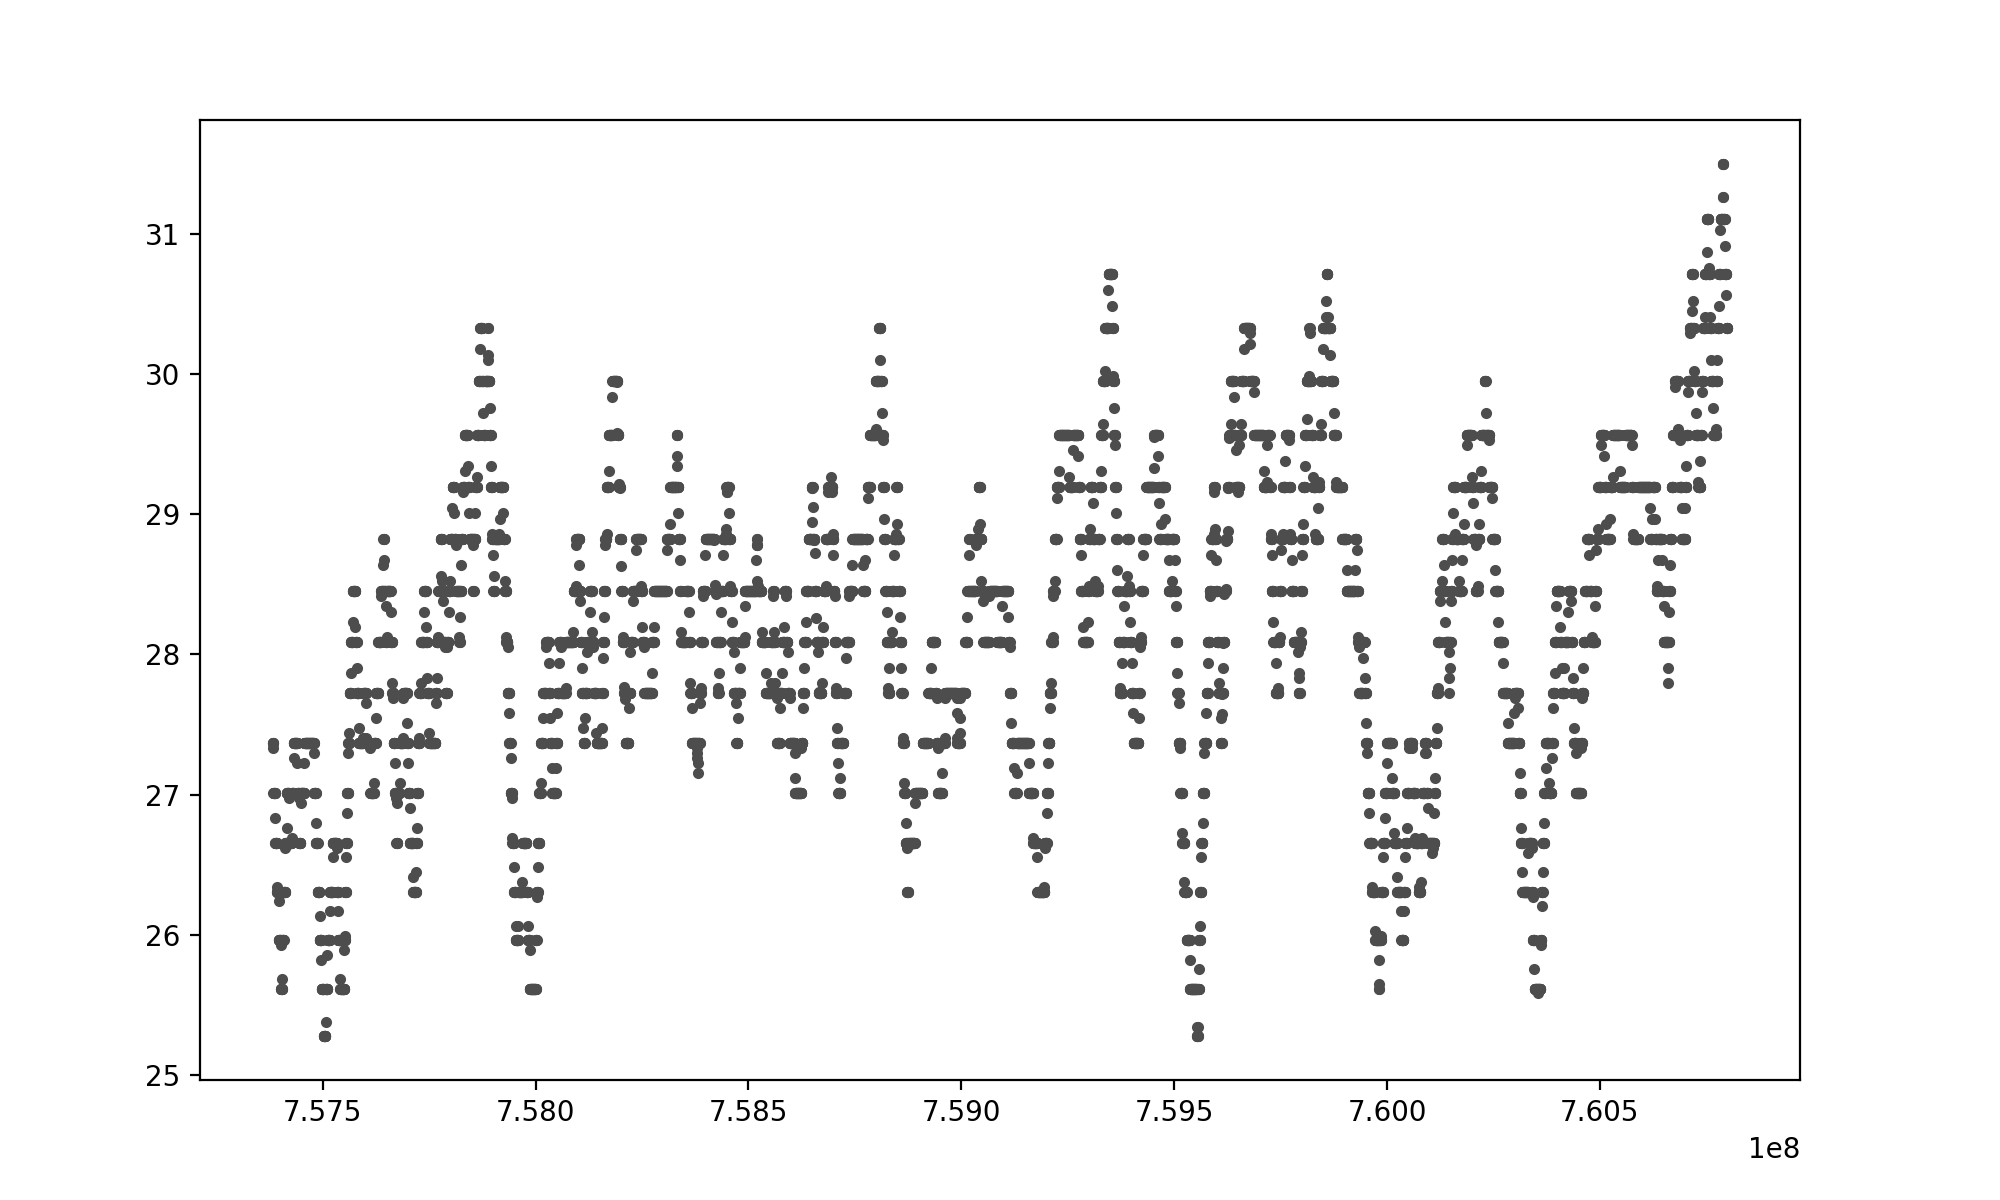

In [4]:
from Ska.engarchive import fetch
import numpy as np

data = fetch.Msid('2LVPLATM', '2022:001', stat='5min')
fig = plt.figure(facecolor=[1,1,1],figsize=(10,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(data.times, data.vals, color=[0.3, 0.3, 0.3], marker='.', linewidth=0)




In [ ]:
fig = plt.figure(facecolor=[1,1,1],figsize=(10,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.hold(True)
ax.plot(data['aacccdpt'].vals[keep], data['aach1t'].vals[keep], color=[0.3, 0.3, 0.3], marker='.', linewidth=0)


In [ ]:
from Chandra.Time import DateTime

a = DateTime('2017:334:19:55:00').secs - DateTime('2017:333:10:58:53').secs 
b = DateTime('2018:006:05:53:43').secs - DateTime('2018:005:23:13:33').secs
a/3600., b/3600.

In [ ]:
from cheta import fetch
fetch.data_source.set('maude')
data = fetch.Msid('215PCAST', '2020:347:01:20:36.756', '2020:347:01:40:09.993', stat=None)
data.vals

In [8]:
class Test(object):
    def __init__(self):
        self.name = 'matt'
        self.len = len

In [10]:
a = Test()
a.name


'matt'

In [13]:
hasattr(a, 'name')

True